# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [5]:
data_dir = './data2'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
# data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)


Extracting mnist:   0%|          | 0.00/60.0K [00:00<?, ?File/s]
Extracting mnist:   1%|          | 669/60.0K [00:00<00:08, 6.69KFile/s]
Extracting mnist:   2%|▏         | 1.31K/60.0K [00:00<00:08, 6.60KFile/s]
Extracting mnist:   3%|▎         | 1.96K/60.0K [00:00<00:08, 6.58KFile/s]
Extracting mnist:   4%|▍         | 2.61K/60.0K [00:00<00:08, 6.51KFile/s]
Extracting mnist:   5%|▌         | 3.26K/60.0K [00:00<00:08, 6.52KFile/s]
Extracting mnist:   7%|▋         | 3.91K/60.0K [00:00<00:08, 6.49KFile/s]
Extracting mnist:   8%|▊         | 4.56K/60.0K [00:00<00:08, 6.49KFile/s]
Extracting mnist:   9%|▊         | 5.20K/60.0K [00:00<00:08, 6.46KFile/s]
Extracting mnist:  10%|▉         | 5.84K/60.0K [00:00<00:08, 6.44KFile/s]
Extracting mnist:  11%|█         | 6.49K/60.0K [00:01<00:08, 6.44KFile/s]
Extracting mnist:  12%|█▏        | 7.13K/60.0K [00:01<00:08, 6.43KFile/s]
Extracting mnist:  13%|█▎        | 7.78K/60.0K [00:01<00:08, 6.45KFile/s]
Extracting mnist:  14%|█▍        | 8.41K/60.0K [

Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

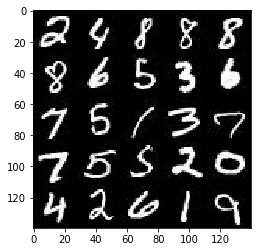

In [7]:
import helper

show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images,'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

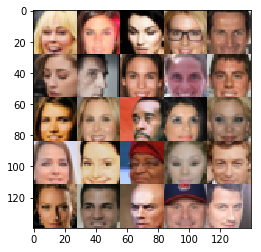

In [8]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [11]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learn_rate = tf.placeholder(tf.float32, name='learn_rate')
    return inputs_real, inputs_z, learn_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/usr/local/lib/python3.5/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/usr/local/lib/python3.5/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'F

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [12]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        # 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x32
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # flatten
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [13]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        
        # fully connected
        x1 = tf.layers.dense(z, 2*2*512)
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 16x16x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 32x32x3
        
        out = tf.tanh(logits)
        
        return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real))
    d_loss_real = tf.reduce_mean(d_loss_real)
        
    d_loss_fake = tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))
    d_loss_fake = tf.reduce_mean(d_loss_fake)
    
    g_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake))
    g_loss = tf.reduce_mean(g_loss)
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    with tf.control_dependencies(ops):
        t_vars = tf.trainable_variables()
        
        d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
        g_vars = [var for var in t_vars if var.name.startswith('generator')]

        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [17]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps +=1
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.9479... Generator Loss: 0.1689
Epoch 0/2... Discriminator Loss: 0.0813... Generator Loss: 4.1792
Epoch 0/2... Discriminator Loss: 3.0881... Generator Loss: 0.0514
Epoch 0/2... Discriminator Loss: 0.5951... Generator Loss: 9.3457


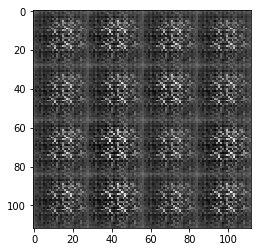

Epoch 0/2... Discriminator Loss: 0.1353... Generator Loss: 3.8042
Epoch 0/2... Discriminator Loss: 0.1068... Generator Loss: 6.7471
Epoch 0/2... Discriminator Loss: 1.7029... Generator Loss: 0.5180
Epoch 0/2... Discriminator Loss: 1.0625... Generator Loss: 1.1633
Epoch 0/2... Discriminator Loss: 0.1938... Generator Loss: 2.8666


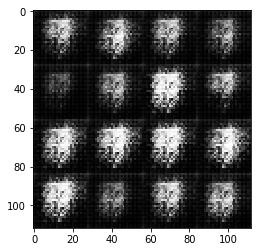

Epoch 0/2... Discriminator Loss: 0.3642... Generator Loss: 1.8497
Epoch 0/2... Discriminator Loss: 0.3044... Generator Loss: 2.1861
Epoch 0/2... Discriminator Loss: 0.1508... Generator Loss: 2.9020
Epoch 0/2... Discriminator Loss: 0.2042... Generator Loss: 2.8115
Epoch 0/2... Discriminator Loss: 0.2623... Generator Loss: 2.6363


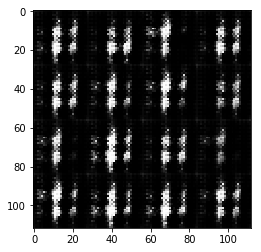

Epoch 0/2... Discriminator Loss: 0.3031... Generator Loss: 5.3346
Epoch 0/2... Discriminator Loss: 0.3425... Generator Loss: 2.7364
Epoch 0/2... Discriminator Loss: 0.2601... Generator Loss: 1.9844
Epoch 0/2... Discriminator Loss: 0.2645... Generator Loss: 3.3119
Epoch 0/2... Discriminator Loss: 0.2557... Generator Loss: 3.4883


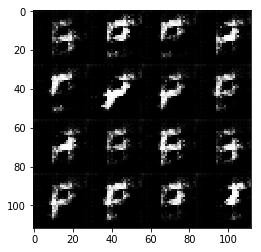

Epoch 0/2... Discriminator Loss: 0.2005... Generator Loss: 2.6847
Epoch 0/2... Discriminator Loss: 0.1589... Generator Loss: 2.7521
Epoch 0/2... Discriminator Loss: 0.3059... Generator Loss: 2.1385
Epoch 0/2... Discriminator Loss: 0.1550... Generator Loss: 3.1595
Epoch 0/2... Discriminator Loss: 0.1454... Generator Loss: 3.1623


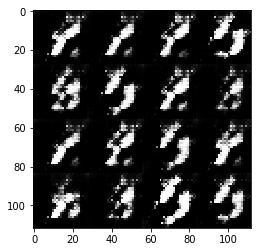

Epoch 0/2... Discriminator Loss: 0.1426... Generator Loss: 3.4261
Epoch 0/2... Discriminator Loss: 0.1560... Generator Loss: 3.3078
Epoch 0/2... Discriminator Loss: 0.1628... Generator Loss: 3.5137
Epoch 0/2... Discriminator Loss: 0.1110... Generator Loss: 3.5935
Epoch 0/2... Discriminator Loss: 0.1165... Generator Loss: 6.4930


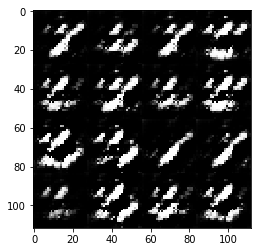

Epoch 0/2... Discriminator Loss: 0.0968... Generator Loss: 4.6686
Epoch 0/2... Discriminator Loss: 0.1163... Generator Loss: 6.3816
Epoch 0/2... Discriminator Loss: 0.2255... Generator Loss: 2.8802
Epoch 0/2... Discriminator Loss: 0.0934... Generator Loss: 3.6354
Epoch 0/2... Discriminator Loss: 0.2096... Generator Loss: 3.7071


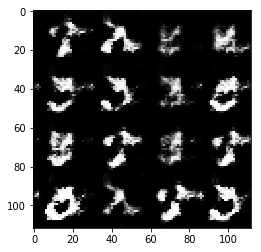

Epoch 0/2... Discriminator Loss: 0.2916... Generator Loss: 2.3319
Epoch 0/2... Discriminator Loss: 0.5431... Generator Loss: 1.7652
Epoch 0/2... Discriminator Loss: 0.4005... Generator Loss: 2.1812
Epoch 0/2... Discriminator Loss: 0.2251... Generator Loss: 3.1397
Epoch 0/2... Discriminator Loss: 0.5469... Generator Loss: 1.4884


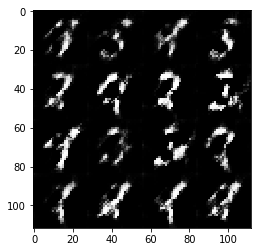

Epoch 0/2... Discriminator Loss: 0.2484... Generator Loss: 3.4602
Epoch 0/2... Discriminator Loss: 0.2116... Generator Loss: 2.6556
Epoch 0/2... Discriminator Loss: 0.2519... Generator Loss: 3.9766
Epoch 0/2... Discriminator Loss: 0.2671... Generator Loss: 2.6251
Epoch 0/2... Discriminator Loss: 0.3002... Generator Loss: 2.6623


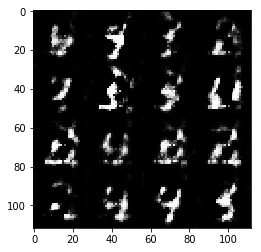

Epoch 0/2... Discriminator Loss: 0.3209... Generator Loss: 2.1529
Epoch 0/2... Discriminator Loss: 0.4966... Generator Loss: 1.7324
Epoch 1/2... Discriminator Loss: 0.5593... Generator Loss: 2.0199
Epoch 1/2... Discriminator Loss: 0.6597... Generator Loss: 3.2246
Epoch 1/2... Discriminator Loss: 0.3713... Generator Loss: 2.1331


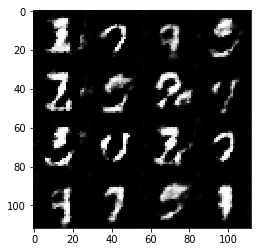

Epoch 1/2... Discriminator Loss: 0.5370... Generator Loss: 4.0439
Epoch 1/2... Discriminator Loss: 0.3659... Generator Loss: 3.5373
Epoch 1/2... Discriminator Loss: 0.5426... Generator Loss: 3.0279
Epoch 1/2... Discriminator Loss: 0.6916... Generator Loss: 1.0735
Epoch 1/2... Discriminator Loss: 0.3677... Generator Loss: 3.2894


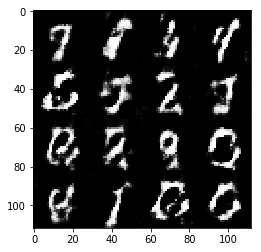

Epoch 1/2... Discriminator Loss: 0.4565... Generator Loss: 2.0418
Epoch 1/2... Discriminator Loss: 0.5284... Generator Loss: 1.8316
Epoch 1/2... Discriminator Loss: 0.6177... Generator Loss: 2.2587
Epoch 1/2... Discriminator Loss: 0.4279... Generator Loss: 1.6643
Epoch 1/2... Discriminator Loss: 0.4065... Generator Loss: 1.9535


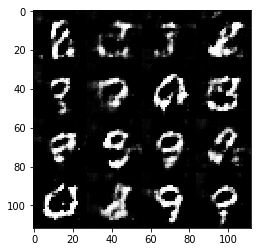

Epoch 1/2... Discriminator Loss: 0.6174... Generator Loss: 2.6393
Epoch 1/2... Discriminator Loss: 1.0545... Generator Loss: 3.9144
Epoch 1/2... Discriminator Loss: 0.5949... Generator Loss: 1.5704
Epoch 1/2... Discriminator Loss: 0.6086... Generator Loss: 1.7049
Epoch 1/2... Discriminator Loss: 0.3665... Generator Loss: 2.6575


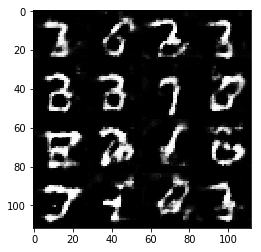

Epoch 1/2... Discriminator Loss: 0.6318... Generator Loss: 3.7216
Epoch 1/2... Discriminator Loss: 0.7282... Generator Loss: 1.7195
Epoch 1/2... Discriminator Loss: 0.6718... Generator Loss: 1.1784
Epoch 1/2... Discriminator Loss: 0.7140... Generator Loss: 1.1138
Epoch 1/2... Discriminator Loss: 0.4813... Generator Loss: 1.5522


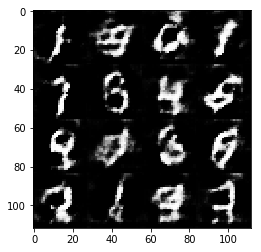

Epoch 1/2... Discriminator Loss: 1.2212... Generator Loss: 0.5770
Epoch 1/2... Discriminator Loss: 0.7635... Generator Loss: 1.0354
Epoch 1/2... Discriminator Loss: 0.6498... Generator Loss: 3.2217
Epoch 1/2... Discriminator Loss: 0.8140... Generator Loss: 1.0253
Epoch 1/2... Discriminator Loss: 0.4817... Generator Loss: 1.8010


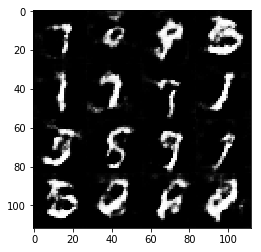

Epoch 1/2... Discriminator Loss: 0.8325... Generator Loss: 0.8515
Epoch 1/2... Discriminator Loss: 0.6462... Generator Loss: 1.3580
Epoch 1/2... Discriminator Loss: 1.2173... Generator Loss: 0.5103
Epoch 1/2... Discriminator Loss: 1.0598... Generator Loss: 0.6878
Epoch 1/2... Discriminator Loss: 0.8414... Generator Loss: 2.5722


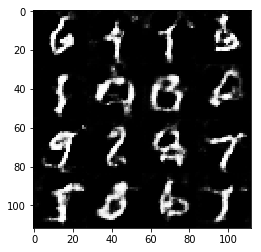

Epoch 1/2... Discriminator Loss: 0.6514... Generator Loss: 2.5319
Epoch 1/2... Discriminator Loss: 0.6172... Generator Loss: 2.4264
Epoch 1/2... Discriminator Loss: 0.5643... Generator Loss: 1.8162
Epoch 1/2... Discriminator Loss: 1.1294... Generator Loss: 2.8397
Epoch 1/2... Discriminator Loss: 0.7629... Generator Loss: 1.2849


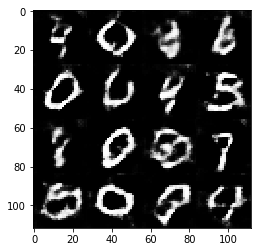

Epoch 1/2... Discriminator Loss: 0.8764... Generator Loss: 0.8467
Epoch 1/2... Discriminator Loss: 0.6085... Generator Loss: 2.2182
Epoch 1/2... Discriminator Loss: 0.6560... Generator Loss: 2.2624
Epoch 1/2... Discriminator Loss: 0.7338... Generator Loss: 1.5262
Epoch 1/2... Discriminator Loss: 0.6991... Generator Loss: 1.4702


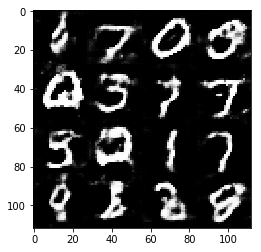

Epoch 1/2... Discriminator Loss: 0.7972... Generator Loss: 0.9135
Epoch 1/2... Discriminator Loss: 0.6111... Generator Loss: 1.6242
Epoch 1/2... Discriminator Loss: 0.9916... Generator Loss: 2.1339
Epoch 1/2... Discriminator Loss: 0.7035... Generator Loss: 1.6596


In [18]:
batch_size = 128
z_dim = 128
learning_rate = 0.0003
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.8250... Generator Loss: 0.2579
Epoch 0/1... Discriminator Loss: 0.1436... Generator Loss: 4.8410
Epoch 0/1... Discriminator Loss: 0.7619... Generator Loss: 0.8616
Epoch 0/1... Discriminator Loss: 0.2396... Generator Loss: 1.9972


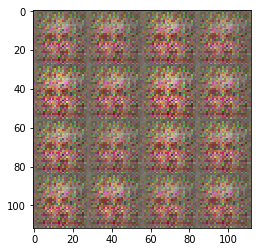

Epoch 0/1... Discriminator Loss: 0.2696... Generator Loss: 7.1961
Epoch 0/1... Discriminator Loss: 0.4439... Generator Loss: 1.1799
Epoch 0/1... Discriminator Loss: 0.7229... Generator Loss: 14.4696
Epoch 0/1... Discriminator Loss: 0.3389... Generator Loss: 8.1322
Epoch 0/1... Discriminator Loss: 0.5110... Generator Loss: 3.9402


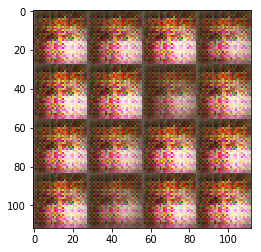

Epoch 0/1... Discriminator Loss: 0.4134... Generator Loss: 1.7111
Epoch 0/1... Discriminator Loss: 0.4059... Generator Loss: 2.7093
Epoch 0/1... Discriminator Loss: 0.3100... Generator Loss: 1.6700
Epoch 0/1... Discriminator Loss: 0.6284... Generator Loss: 1.2305
Epoch 0/1... Discriminator Loss: 0.2406... Generator Loss: 3.7394


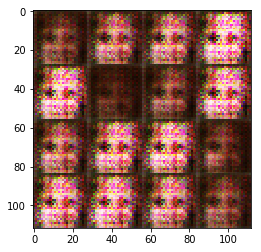

Epoch 0/1... Discriminator Loss: 0.3064... Generator Loss: 1.8114
Epoch 0/1... Discriminator Loss: 0.3358... Generator Loss: 2.2183
Epoch 0/1... Discriminator Loss: 0.2411... Generator Loss: 6.8867
Epoch 0/1... Discriminator Loss: 0.4136... Generator Loss: 2.1352
Epoch 0/1... Discriminator Loss: 0.2970... Generator Loss: 2.0580


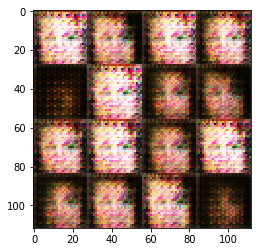

Epoch 0/1... Discriminator Loss: 0.4478... Generator Loss: 1.8033
Epoch 0/1... Discriminator Loss: 0.2018... Generator Loss: 4.8726
Epoch 0/1... Discriminator Loss: 0.3913... Generator Loss: 2.1398
Epoch 0/1... Discriminator Loss: 1.1892... Generator Loss: 4.7633
Epoch 0/1... Discriminator Loss: 0.5204... Generator Loss: 2.0159


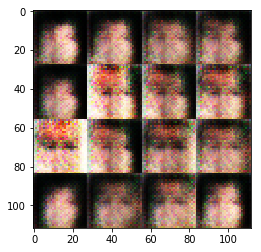

Epoch 0/1... Discriminator Loss: 0.8704... Generator Loss: 1.3582
Epoch 0/1... Discriminator Loss: 1.0302... Generator Loss: 1.5855
Epoch 0/1... Discriminator Loss: 2.1597... Generator Loss: 0.1871
Epoch 0/1... Discriminator Loss: 0.9152... Generator Loss: 1.1429
Epoch 0/1... Discriminator Loss: 1.0400... Generator Loss: 1.1010


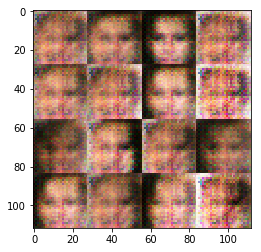

Epoch 0/1... Discriminator Loss: 1.2147... Generator Loss: 0.8937
Epoch 0/1... Discriminator Loss: 0.5726... Generator Loss: 1.5499
Epoch 0/1... Discriminator Loss: 1.0394... Generator Loss: 2.0492
Epoch 0/1... Discriminator Loss: 1.2575... Generator Loss: 0.8460
Epoch 0/1... Discriminator Loss: 0.8669... Generator Loss: 1.1033


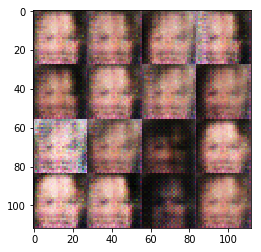

Epoch 0/1... Discriminator Loss: 1.1300... Generator Loss: 0.7855
Epoch 0/1... Discriminator Loss: 1.0369... Generator Loss: 2.2138
Epoch 0/1... Discriminator Loss: 0.7021... Generator Loss: 1.2921
Epoch 0/1... Discriminator Loss: 0.8659... Generator Loss: 1.1882
Epoch 0/1... Discriminator Loss: 0.7899... Generator Loss: 1.1238


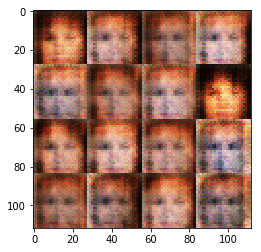

Epoch 0/1... Discriminator Loss: 0.7880... Generator Loss: 1.5132
Epoch 0/1... Discriminator Loss: 1.1256... Generator Loss: 2.1417
Epoch 0/1... Discriminator Loss: 1.1884... Generator Loss: 0.7317
Epoch 0/1... Discriminator Loss: 0.8160... Generator Loss: 1.6333
Epoch 0/1... Discriminator Loss: 1.1869... Generator Loss: 0.6141


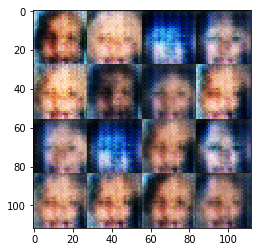

Epoch 0/1... Discriminator Loss: 0.6607... Generator Loss: 1.2221
Epoch 0/1... Discriminator Loss: 1.1877... Generator Loss: 0.6643
Epoch 0/1... Discriminator Loss: 0.9200... Generator Loss: 1.0927
Epoch 0/1... Discriminator Loss: 1.4679... Generator Loss: 0.4374
Epoch 0/1... Discriminator Loss: 0.8016... Generator Loss: 1.4498


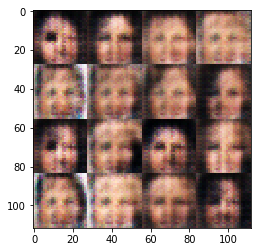

Epoch 0/1... Discriminator Loss: 0.8854... Generator Loss: 1.1578
Epoch 0/1... Discriminator Loss: 0.9923... Generator Loss: 2.0347
Epoch 0/1... Discriminator Loss: 0.9811... Generator Loss: 1.6072
Epoch 0/1... Discriminator Loss: 0.6571... Generator Loss: 1.4715
Epoch 0/1... Discriminator Loss: 1.3035... Generator Loss: 0.9708


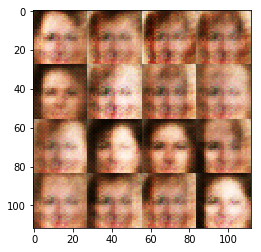

Epoch 0/1... Discriminator Loss: 0.7853... Generator Loss: 2.0968
Epoch 0/1... Discriminator Loss: 0.9077... Generator Loss: 1.0219
Epoch 0/1... Discriminator Loss: 0.6302... Generator Loss: 1.6447
Epoch 0/1... Discriminator Loss: 0.6120... Generator Loss: 1.6308
Epoch 0/1... Discriminator Loss: 1.1819... Generator Loss: 0.6070


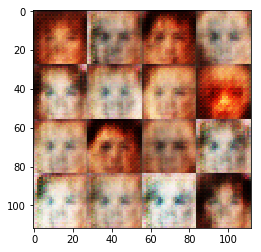

Epoch 0/1... Discriminator Loss: 0.8804... Generator Loss: 1.3491
Epoch 0/1... Discriminator Loss: 0.7026... Generator Loss: 1.6551
Epoch 0/1... Discriminator Loss: 1.4174... Generator Loss: 4.5357
Epoch 0/1... Discriminator Loss: 0.8254... Generator Loss: 2.0786
Epoch 0/1... Discriminator Loss: 1.1274... Generator Loss: 0.6182


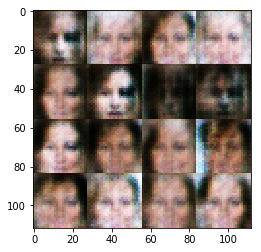

Epoch 0/1... Discriminator Loss: 0.7728... Generator Loss: 1.3712
Epoch 0/1... Discriminator Loss: 0.8756... Generator Loss: 1.6500
Epoch 0/1... Discriminator Loss: 1.3401... Generator Loss: 3.0154
Epoch 0/1... Discriminator Loss: 1.0837... Generator Loss: 0.8517
Epoch 0/1... Discriminator Loss: 0.8687... Generator Loss: 1.2082


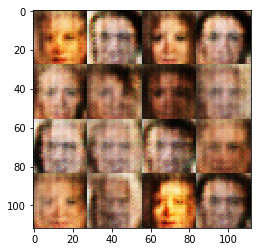

Epoch 0/1... Discriminator Loss: 0.7768... Generator Loss: 1.3216
Epoch 0/1... Discriminator Loss: 0.7317... Generator Loss: 2.3221
Epoch 0/1... Discriminator Loss: 0.9288... Generator Loss: 1.7724
Epoch 0/1... Discriminator Loss: 0.7614... Generator Loss: 1.1589
Epoch 0/1... Discriminator Loss: 0.9541... Generator Loss: 0.8086


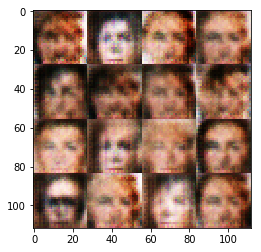

Epoch 0/1... Discriminator Loss: 0.8973... Generator Loss: 3.0765
Epoch 0/1... Discriminator Loss: 1.0497... Generator Loss: 1.3592
Epoch 0/1... Discriminator Loss: 0.6389... Generator Loss: 1.9758
Epoch 0/1... Discriminator Loss: 0.8040... Generator Loss: 2.3793
Epoch 0/1... Discriminator Loss: 1.0265... Generator Loss: 0.8150


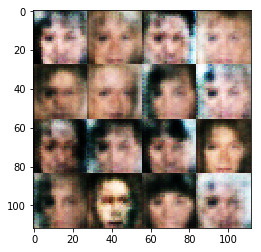

Epoch 0/1... Discriminator Loss: 1.1147... Generator Loss: 0.9644
Epoch 0/1... Discriminator Loss: 1.1322... Generator Loss: 0.6993
Epoch 0/1... Discriminator Loss: 0.7541... Generator Loss: 1.3203
Epoch 0/1... Discriminator Loss: 0.9816... Generator Loss: 0.9386
Epoch 0/1... Discriminator Loss: 0.9700... Generator Loss: 2.1518


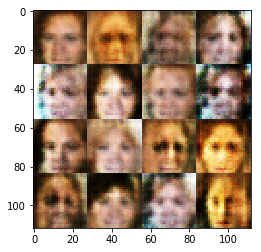

Epoch 0/1... Discriminator Loss: 0.7834... Generator Loss: 1.7421
Epoch 0/1... Discriminator Loss: 1.2206... Generator Loss: 0.5720
Epoch 0/1... Discriminator Loss: 0.7049... Generator Loss: 1.3184
Epoch 0/1... Discriminator Loss: 0.8785... Generator Loss: 1.2583
Epoch 0/1... Discriminator Loss: 0.9367... Generator Loss: 2.0533


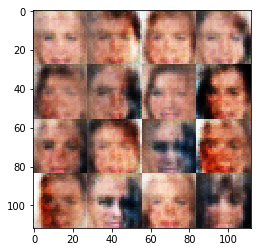

Epoch 0/1... Discriminator Loss: 0.8885... Generator Loss: 0.9296
Epoch 0/1... Discriminator Loss: 0.8800... Generator Loss: 1.3843
Epoch 0/1... Discriminator Loss: 0.8711... Generator Loss: 1.6636
Epoch 0/1... Discriminator Loss: 0.9687... Generator Loss: 1.4932
Epoch 0/1... Discriminator Loss: 0.7954... Generator Loss: 1.2896


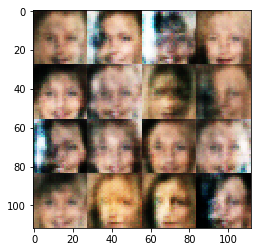

Epoch 0/1... Discriminator Loss: 0.9276... Generator Loss: 1.9611
Epoch 0/1... Discriminator Loss: 0.9661... Generator Loss: 0.7661
Epoch 0/1... Discriminator Loss: 0.9255... Generator Loss: 1.8048
Epoch 0/1... Discriminator Loss: 0.8557... Generator Loss: 0.9452
Epoch 0/1... Discriminator Loss: 0.9763... Generator Loss: 1.4461


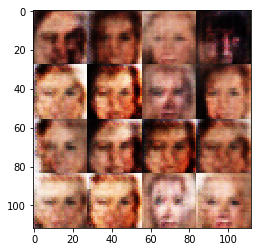

Epoch 0/1... Discriminator Loss: 0.9355... Generator Loss: 0.9901
Epoch 0/1... Discriminator Loss: 0.9090... Generator Loss: 2.0769
Epoch 0/1... Discriminator Loss: 0.8994... Generator Loss: 1.7313
Epoch 0/1... Discriminator Loss: 0.6460... Generator Loss: 1.8285
Epoch 0/1... Discriminator Loss: 1.1179... Generator Loss: 0.5703


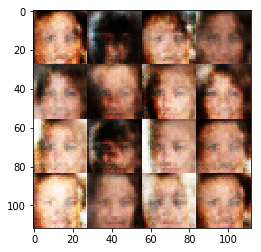

Epoch 0/1... Discriminator Loss: 1.0382... Generator Loss: 0.9998
Epoch 0/1... Discriminator Loss: 0.8540... Generator Loss: 2.1047
Epoch 0/1... Discriminator Loss: 0.9274... Generator Loss: 1.1706
Epoch 0/1... Discriminator Loss: 0.7657... Generator Loss: 1.1280
Epoch 0/1... Discriminator Loss: 0.7631... Generator Loss: 1.3850


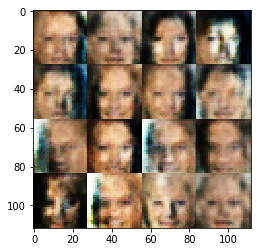

Epoch 0/1... Discriminator Loss: 1.3994... Generator Loss: 2.5505
Epoch 0/1... Discriminator Loss: 0.8001... Generator Loss: 1.4291
Epoch 0/1... Discriminator Loss: 0.9573... Generator Loss: 0.7425
Epoch 0/1... Discriminator Loss: 1.1622... Generator Loss: 0.7555
Epoch 0/1... Discriminator Loss: 1.0583... Generator Loss: 1.0103


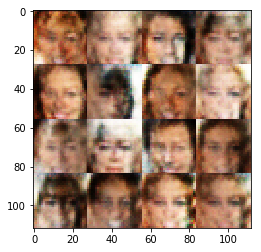

Epoch 0/1... Discriminator Loss: 1.7775... Generator Loss: 0.2611
Epoch 0/1... Discriminator Loss: 0.8528... Generator Loss: 1.1382
Epoch 0/1... Discriminator Loss: 0.8326... Generator Loss: 1.5942
Epoch 0/1... Discriminator Loss: 0.9605... Generator Loss: 0.8976
Epoch 0/1... Discriminator Loss: 1.3860... Generator Loss: 0.4092


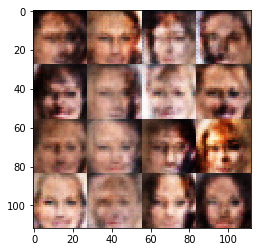

Epoch 0/1... Discriminator Loss: 0.8863... Generator Loss: 0.9343
Epoch 0/1... Discriminator Loss: 0.9764... Generator Loss: 1.2077
Epoch 0/1... Discriminator Loss: 0.9320... Generator Loss: 1.0987
Epoch 0/1... Discriminator Loss: 0.6397... Generator Loss: 1.8914
Epoch 0/1... Discriminator Loss: 1.0263... Generator Loss: 0.8283


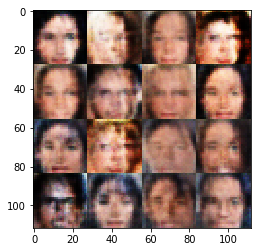

Epoch 0/1... Discriminator Loss: 1.3852... Generator Loss: 0.4231
Epoch 0/1... Discriminator Loss: 0.8244... Generator Loss: 1.3886
Epoch 0/1... Discriminator Loss: 1.2470... Generator Loss: 0.5519
Epoch 0/1... Discriminator Loss: 0.9771... Generator Loss: 1.0642
Epoch 0/1... Discriminator Loss: 0.8637... Generator Loss: 2.0844


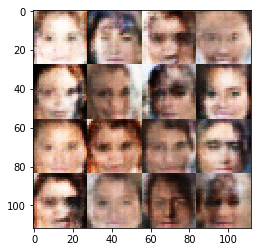

Epoch 0/1... Discriminator Loss: 0.7271... Generator Loss: 1.2666
Epoch 0/1... Discriminator Loss: 0.7065... Generator Loss: 1.5834
Epoch 0/1... Discriminator Loss: 0.9033... Generator Loss: 0.9545
Epoch 0/1... Discriminator Loss: 1.4101... Generator Loss: 2.1368
Epoch 0/1... Discriminator Loss: 0.9276... Generator Loss: 1.1037


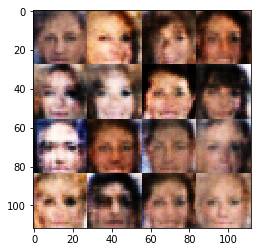

Epoch 0/1... Discriminator Loss: 0.9458... Generator Loss: 1.3167
Epoch 0/1... Discriminator Loss: 0.8268... Generator Loss: 1.2942
Epoch 0/1... Discriminator Loss: 0.9839... Generator Loss: 0.8457
Epoch 0/1... Discriminator Loss: 0.9558... Generator Loss: 1.2991
Epoch 0/1... Discriminator Loss: 1.1607... Generator Loss: 1.4188


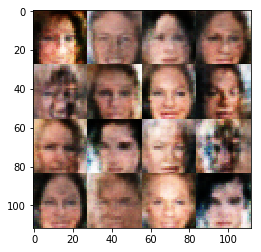

Epoch 0/1... Discriminator Loss: 0.9775... Generator Loss: 1.2479
Epoch 0/1... Discriminator Loss: 0.7815... Generator Loss: 1.1399
Epoch 0/1... Discriminator Loss: 1.2004... Generator Loss: 0.6272
Epoch 0/1... Discriminator Loss: 1.3359... Generator Loss: 2.5241
Epoch 0/1... Discriminator Loss: 0.8160... Generator Loss: 1.2938


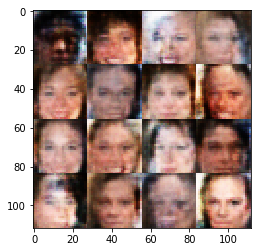

Epoch 0/1... Discriminator Loss: 1.0922... Generator Loss: 0.6842
Epoch 0/1... Discriminator Loss: 1.0644... Generator Loss: 1.0203
Epoch 0/1... Discriminator Loss: 1.0732... Generator Loss: 0.7308
Epoch 0/1... Discriminator Loss: 0.8078... Generator Loss: 1.5941
Epoch 0/1... Discriminator Loss: 1.3518... Generator Loss: 0.4429


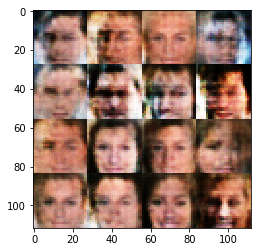

Epoch 0/1... Discriminator Loss: 1.0150... Generator Loss: 1.0043
Epoch 0/1... Discriminator Loss: 0.9739... Generator Loss: 1.7223
Epoch 0/1... Discriminator Loss: 1.3462... Generator Loss: 2.1138
Epoch 0/1... Discriminator Loss: 0.9387... Generator Loss: 0.9194
Epoch 0/1... Discriminator Loss: 1.0571... Generator Loss: 1.0218


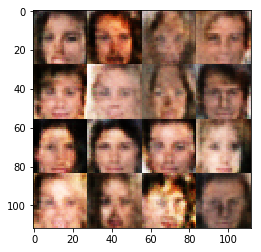

Epoch 0/1... Discriminator Loss: 1.2420... Generator Loss: 0.5167
Epoch 0/1... Discriminator Loss: 0.9594... Generator Loss: 0.9328
Epoch 0/1... Discriminator Loss: 1.1907... Generator Loss: 0.5842
Epoch 0/1... Discriminator Loss: 0.8120... Generator Loss: 1.3658


In [19]:
batch_size = 128
z_dim = 128
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.